In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc

# Loading Data

In [2]:
types = {'codGiro':np.float64,
         'codEstab':np.int32,'flagLimaProvEstab':np.int32,
         'ubigeoEstab':np.float64,'ctdTrx':np.int32,
         'ratingMonto':np.float64,
        }
train = pd.read_csv("01dataBaseTrainTrxRec.csv", sep =",", index_col=False, dtype=types,parse_dates =["fechaOper"])

# train.set_index(['codCliente'], inplace=True)

In [5]:
#train["year"]  = train["fechaOper"].dt.year
#train["month"] = train["fechaOper"].dt.month
#train["day"] = train["fechaOper"].dt.day
# train["year_month"] = train["fechaOper"].dt.year.apply(str)+ "_"+ train["fechaOper"].dt.month.apply(str)

In [3]:
train.codGiro.unique()

array([138.,  75., 110.,  66.,  85., 122., 112.,  nan, 114.,  72., 143.,
        80.,  93., 198., 163.,  79., 209., 189.,  91.,  78.,  48., 157.,
        50., 214.,  42., 210., 105., 111.,  95.,  26., 135., 225.,  90.,
        41., 180.,  84.,  97., 152.,  96.,  77., 155., 146.,  74., 200.,
        94.,  89., 212.,  16.,  64.,  49., 128.,  73., 172., 124., 206.,
       181., 182., 219.,  53., 168., 184.,  54.,  69., 203., 160., 199.,
        87.,  47., 205., 103., 115.,  56., 202.,  19., 192.,  83.,  92.,
       166.,  98.,  81., 121., 177., 211., 220.,  99.,  58., 109., 201.,
       125., 183., 100., 169., 197., 127., 130.,  65., 207.,  20., 185.,
       108., 142., 129.,  76., 167., 162., 133., 217., 224., 149.,  14.,
        71.,  70., 145., 126., 147.,  31., 222., 165., 106., 186.,  60.,
       204., 120.,  51.,  43.,  44.,  63., 213., 101., 104.,  57., 216.,
        27.,  61., 123.,  25.,  32., 173., 137.,   3.,  67., 195., 153.,
       179.,  17., 154.,  39., 171.,  40., 159., 19

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1591617 entries, 0 to 1591616
Data columns (total 8 columns):
fechaOper            1591617 non-null datetime64[ns]
codCliente           1591617 non-null int64
codGiro              1498931 non-null float64
codEstab             1591617 non-null int32
flagLimaProvEstab    1591617 non-null int32
ubigeoEstab          1498931 non-null float64
ctdTrx               1591617 non-null int32
ratingMonto          1591617 non-null float64
dtypes: datetime64[ns](1), float64(3), int32(3), int64(1)
memory usage: 78.9 MB


In [3]:
na_value = {'rangoEdad': ['nan']}
perfil = pd.read_csv("02dataBasePerfilRec.csv", sep =",", na_values =na_value)

## Preprocessing

### train Imputation

### perfil imputation

In [30]:
dfilted = perfil.loc[pd.isnull(perfil["saldoTcEntidad1"])].copy()

In [90]:
perfil.head()

,codCliente,rangoEdad,rangoIngreso,flagGenero,flagLimaProvCliente,ubigeoCliente,rangoCtdProdAct,rangoCtdProdPas,rangoCtdProdSeg,flagBxi,saldoTcEntidad1,saldoTcEntidad2,saldoTcEntidad3,saldoTcEntidad4
0,24041,Rango2,Rango2,1,0,360.0,Rango1,Rango1,Rango1,1,CAT_NA,CAT_NA,CAT_NA,CAT_NA
1,9040,Rango4,Rango6,1,1,260.0,Rango1,Rango1,Rango1,1,Rango1,Rango1,Rango1,Rango1
2,18233,Rango2,Rango1,1,1,273.0,Rango1,Rango2,Rango1,1,Rango2,Rango1,Rango1,Rango1
3,7226,Rango5,Rango3,0,1,241.0,Rango1,Rango2,Rango1,1,Rango1,Rango2,Rango1,Rango2
4,21617,Rango3,Rango2,1,1,268.0,Rango1,Rango1,Rango1,0,CAT_NA,CAT_NA,CAT_NA,CAT_NA


In [12]:
train_perfil = pd.merge(train,perfil, right_on="codCliente", left_on="codCliente")

In [11]:
train_perfil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1591617 entries, 0 to 1591616
Data columns (total 21 columns):
fechaOper              1591617 non-null datetime64[ns]
codCliente             1591617 non-null int64
codGiro                1591617 non-null object
codEstab               1591617 non-null int32
flagLimaProvEstab      1591617 non-null int32
ubigeoEstab            1591617 non-null object
ctdTrx                 1591617 non-null int32
ratingMonto            1591617 non-null float64
rangoEdad              1591617 non-null object
rangoIngreso           1591617 non-null object
flagGenero             1591617 non-null int64
flagLimaProvCliente    1591617 non-null int64
ubigeoCliente          1591617 non-null object
rangoCtdProdAct        1591617 non-null object
rangoCtdProdPas        1591617 non-null object
rangoCtdProdSeg        1591617 non-null object
flagBxi                1591617 non-null int64
saldoTcEntidad1        1591617 non-null object
saldoTcEntidad2        1591617 non-null

## Exploratory Data Analysis

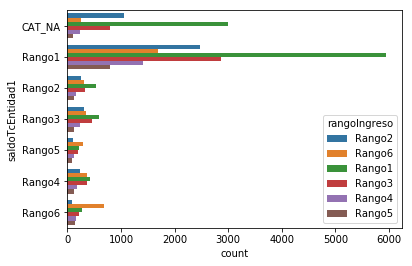

In [47]:
sns.countplot(y="saldoTcEntidad1",data=perfil, hue="rangoIngreso")

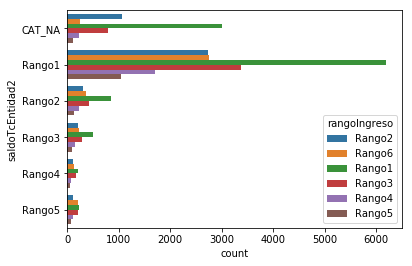

In [48]:
sns.countplot(y= "saldoTcEntidad2",data=perfil, hue="rangoIngreso")

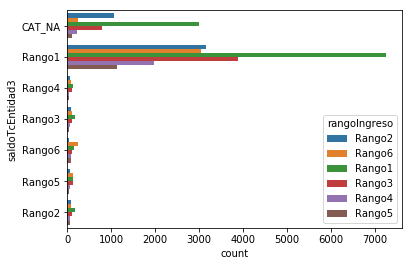

In [49]:
sns.countplot(y= "saldoTcEntidad3",data=perfil, hue="rangoIngreso")

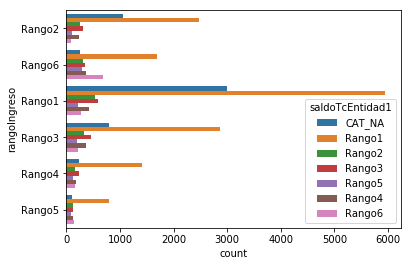

In [53]:
sns.countplot(y= "rangoIngreso",data=perfil, hue="saldoTcEntidad1")

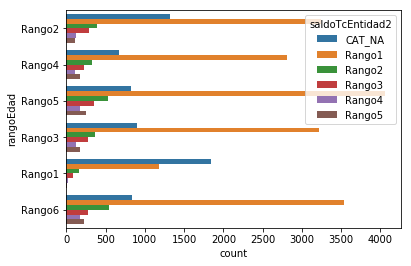

In [52]:
sns.countplot(y= "rangoEdad",data=perfil, hue="saldoTcEntidad2")

In [59]:
train_perfil = pd.merge(train,perfil, right_on="codCliente", left_on="codCliente")

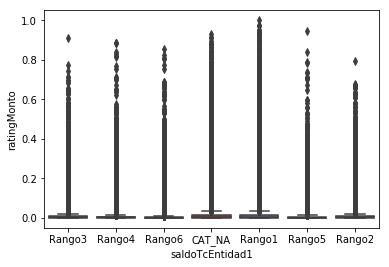

In [56]:
sns.boxplot(x="saldoTcEntidad1", y="ratingMonto",data=train_perfil)

In [71]:
train_perfil.groupby(["saldoTcEntidad1"])["rangoEdad","ratingMonto"].agg(["mean","median","max","min"])

ratingMonto                              
                       mean    median       max       min
saldoTcEntidad1                                          
CAT_NA             0.017208  0.005989  0.931892  0.000007
Rango1             0.015890  0.005654  1.000000  0.000004
Rango2             0.011531  0.003798  0.795876  0.000008
Rango3             0.010559  0.003395  0.911381  0.000011
Rango4             0.008666  0.002739  0.886653  0.000013
Rango5             0.007513  0.002321  0.945582  0.000007
Rango6             0.006381  0.001937  0.857492  0.000003

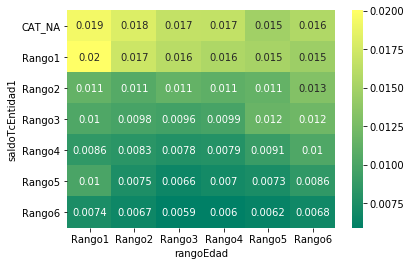

In [82]:
data_heat = train_perfil.pivot_table(index="saldoTcEntidad1",columns="rangoEdad",values="ratingMonto",aggfunc="mean")
sns.heatmap(data_heat,annot=True, cmap="summer")

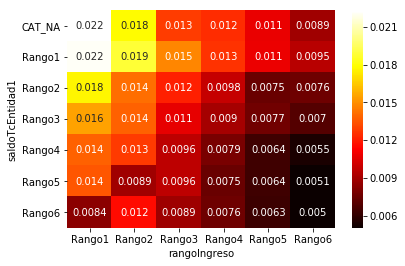

In [83]:
pt_ringreso = train_perfil.pivot_table(index="saldoTcEntidad1",columns="rangoIngreso",values="ratingMonto",aggfunc="mean")
sns.heatmap(pt_ringreso, annot=True,cmap="hot")

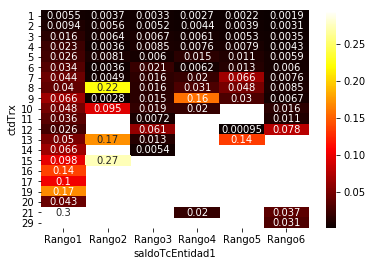

In [65]:
pt_ringreso = train_perfil.pivot_table(index="ctdTrx",columns="saldoTcEntidad1",values="ratingMonto",aggfunc="median")
sns.heatmap(pt_ringreso, annot=True,cmap="hot")

In [75]:
train_perfil.pivot_table(index="saldoTcEntidad1",columns="rangoEdad",values="ratingMonto",aggfunc="mean")

rangoEdad,Rango1,Rango2,Rango3,Rango4,Rango5,Rango6
saldoTcEntidad1,,,,,,
CAT_NA,0.019322,0.018083,0.016668,0.016611,0.014799,0.015632
Rango1,0.020016,0.017182,0.016118,0.015533,0.015135,0.014574
Rango2,0.011459,0.010601,0.011462,0.011090,0.011460,0.013129
Rango3,0.010285,0.009821,0.009558,0.009862,0.011715,0.012028
Rango4,0.008560,0.008257,0.007793,0.007939,0.009081,0.010298
Rango5,0.010010,0.007535,0.006632,0.007024,0.007342,0.008564
Rango6,0.007408,0.006700,0.005906,0.005956,0.006243,0.006831


In [18]:
ppre= perfil.copy()
ppre["rangoEdad"] = ppre["rangoEdad"].fillna(ppre["rangoEdad"].mode()[0])

In [21]:
ppre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
codCliente             30000 non-null int64
rangoEdad              30000 non-null object
rangoIngreso           28737 non-null object
flagGenero             30000 non-null int64
flagLimaProvCliente    30000 non-null int64
ubigeoCliente          29996 non-null float64
rangoCtdProdAct        30000 non-null object
rangoCtdProdPas        30000 non-null object
rangoCtdProdSeg        30000 non-null object
flagBxi                30000 non-null int64
saldoTcEntidad1        23574 non-null object
saldoTcEntidad2        23574 non-null object
saldoTcEntidad3        23574 non-null object
saldoTcEntidad4        23574 non-null object
dtypes: float64(1), int64(4), object(9)
memory usage: 3.2+ MB


In [22]:
ppre["ubigeoCliente"] = ppre.groupby(["flagBxi","rangoEdad","rangoCtdProdAct","rangoCtdProdPas","rangoCtdProdSeg"])["ubigeoCliente"].transform(lambda x: x.fillna(x.mode()[0]))

In [23]:
ppre["rangoIngreso"] = ppre.groupby(["flagBxi","rangoEdad","rangoCtdProdAct","rangoCtdProdPas","rangoCtdProdSeg"])["rangoIngreso"].transform(lambda x: x.fillna(x.mode()[0]))

In [24]:
ppre.saldoTcEntidad1.value_counts(dropna=False)

Rango1    15429
NaN        6426
Rango3     2076
Rango2     1731
Rango4     1713
Rango6     1571
Rango5     1054
Name: saldoTcEntidad1, dtype: int64

In [47]:
ppre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
codCliente             30000 non-null int64
rangoEdad              30000 non-null object
rangoIngreso           30000 non-null object
flagGenero             30000 non-null int64
flagLimaProvCliente    30000 non-null int64
ubigeoCliente          30000 non-null float64
rangoCtdProdAct        30000 non-null object
rangoCtdProdPas        30000 non-null object
rangoCtdProdSeg        30000 non-null object
flagBxi                30000 non-null int64
saldoTcEntidad1        23574 non-null object
saldoTcEntidad2        23574 non-null object
saldoTcEntidad3        23574 non-null object
saldoTcEntidad4        23574 non-null object
dtypes: float64(1), int64(4), object(9)
memory usage: 3.2+ MB


In [49]:
data_train = pd.merge(train,ppre, right_on="codCliente", left_on="codCliente")

In [50]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1591617 entries, 0 to 1591616
Data columns (total 21 columns):
fechaOper              1591617 non-null datetime64[ns]
codCliente             1591617 non-null int64
codGiro                1498931 non-null float64
codEstab               1591617 non-null int32
flagLimaProvEstab      1591617 non-null int32
ubigeoEstab            1498931 non-null float64
ctdTrx                 1591617 non-null int32
ratingMonto            1591617 non-null float64
rangoEdad              1591617 non-null object
rangoIngreso           1591617 non-null object
flagGenero             1591617 non-null int64
flagLimaProvCliente    1591617 non-null int64
ubigeoCliente          1591617 non-null float64
rangoCtdProdAct        1591617 non-null object
rangoCtdProdPas        1591617 non-null object
rangoCtdProdSeg        1591617 non-null object
flagBxi                1591617 non-null int64
saldoTcEntidad1        1591617 non-null object
saldoTcEntidad2        1591617 non-n

In [51]:
val_imputation  = { 'ubigeoEstab':'na_ubigeoestab',
                    'codGiro':'na_codgiro',
                    'saldoTcEntidad1':'Rango0','saldoTcEntidad2':'Rango0',
                   'saldoTcEntidad3':'Rango0','saldoTcEntidad4':'Rango0' }
data_train.fillna(value=val_imputation, inplace=True)

In [52]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1591617 entries, 0 to 1591616
Data columns (total 21 columns):
fechaOper              1591617 non-null datetime64[ns]
codCliente             1591617 non-null int64
codGiro                1591617 non-null object
codEstab               1591617 non-null int32
flagLimaProvEstab      1591617 non-null int32
ubigeoEstab            1591617 non-null object
ctdTrx                 1591617 non-null int32
ratingMonto            1591617 non-null float64
rangoEdad              1591617 non-null object
rangoIngreso           1591617 non-null object
flagGenero             1591617 non-null int64
flagLimaProvCliente    1591617 non-null int64
ubigeoCliente          1591617 non-null float64
rangoCtdProdAct        1591617 non-null object
rangoCtdProdPas        1591617 non-null object
rangoCtdProdSeg        1591617 non-null object
flagBxi                1591617 non-null int64
saldoTcEntidad1        1591617 non-null object
saldoTcEntidad2        1591617 non-nul

### Saving dataset Tablas Base

In [53]:
val_imputation  = {'saldoTcEntidad1':'Rango0','saldoTcEntidad2':'Rango0',
                   'saldoTcEntidad3':'Rango0','saldoTcEntidad4':'Rango0' }
ppre.fillna(value=val_imputation, inplace=True)
ppre.to_csv("data_perfil.csv", index=False)

In [54]:
data_train.to_csv("data_train.csv",index=False)

In [55]:
estab = data_train.copy()
estab = estab.drop_duplicates(subset=["codEstab","codGiro","flagLimaProvEstab","ubigeoEstab"], keep ='first')

In [56]:
estab.to_csv("establecimiento.csv", index=False)
#data_train.to_csv("data_train.csv",index=False)

In [23]:
test_keys = pd.read_csv("05dataBaseTestKeyRec.csv")
data_estab = pd.read_csv("establecimiento.csv")
data_train = pd.read_csv("data_train.csv",parse_dates=["fechaOper"])
# data_estab.set_index(['codEstab'], inplace=True)
data_perfil = pd.read_csv("data_perfil.csv")

In [28]:
data_perfil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
codCliente             30000 non-null int64
rangoEdad              30000 non-null object
rangoIngreso           30000 non-null object
flagGenero             30000 non-null int64
flagLimaProvCliente    30000 non-null int64
ubigeoCliente          30000 non-null float64
rangoCtdProdAct        30000 non-null object
rangoCtdProdPas        30000 non-null object
rangoCtdProdSeg        30000 non-null object
flagBxi                30000 non-null int64
saldoTcEntidad1        30000 non-null object
saldoTcEntidad2        30000 non-null object
saldoTcEntidad3        30000 non-null object
saldoTcEntidad4        30000 non-null object
dtypes: float64(1), int64(4), object(9)
memory usage: 3.2+ MB


In [24]:
data_estab1 = data_estab[["codGiro","codEstab","flagLimaProvEstab","ubigeoEstab","fechaOper","ctdTrx"]]
data_estab1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74339 entries, 0 to 74338
Data columns (total 6 columns):
codGiro              74339 non-null object
codEstab             74339 non-null int64
flagLimaProvEstab    74339 non-null int64
ubigeoEstab          74339 non-null object
fechaOper            74339 non-null object
ctdTrx               74339 non-null int64
dtypes: int64(3), object(3)
memory usage: 3.4+ MB


In [78]:
test_keys.head()

,codCliente,codEstab
0,1182,68644
1,1279,789
2,12884,6263
3,1333,899
4,1366,6180


In [7]:
data_train.head()

,fechaOper,codCliente,codGiro,codEstab,flagLimaProvEstab,ubigeoEstab,ctdTrx,ratingMonto,rangoEdad,rangoIngreso,...,flagLimaProvCliente,ubigeoCliente,rangoCtdProdAct,rangoCtdProdPas,rangoCtdProdSeg,flagBxi,saldoTcEntidad1,saldoTcEntidad2,saldoTcEntidad3,saldoTcEntidad4
0,2017-01-29,7649,138.0,43629,1,176.0,1,0.014072,Rango4,Rango2,...,1,281.0,Rango1,Rango2,Rango1,1,Rango3,Rango1,Rango1,Rango1
1,2017-05-07,7649,75.0,830,1,157.0,1,0.000821,Rango4,Rango2,...,1,281.0,Rango1,Rango2,Rango1,1,Rango3,Rango1,Rango1,Rango1
2,2016-12-20,7649,75.0,829,1,175.0,1,0.001220,Rango4,Rango2,...,1,281.0,Rango1,Rango2,Rango1,1,Rango3,Rango1,Rango1,Rango1
3,2017-02-16,7649,114.0,21603,1,175.0,1,0.000985,Rango4,Rango2,...,1,281.0,Rango1,Rango2,Rango1,1,Rango3,Rango1,Rango1,Rango1
4,2017-08-30,7649,110.0,46216,1,203.0,1,0.003635,Rango4,Rango2,...,1,281.0,Rango1,Rango2,Rango1,1,Rango3,Rango1,Rango1,Rango1


In [31]:
test = pd.merge(test_keys, data_perfil, on="codCliente", how="left")
test = pd.merge(test, data_estab1, on="codEstab", how="left")

In [6]:
(test.columns)

Index(['codCliente', 'codEstab', 'rangoEdad', 'rangoIngreso', 'flagGenero',
       'flagLimaProvCliente', 'ubigeoCliente', 'rangoCtdProdAct',
       'rangoCtdProdPas', 'rangoCtdProdSeg', 'flagBxi', 'saldoTcEntidad1',
       'saldoTcEntidad2', 'saldoTcEntidad3', 'saldoTcEntidad4', 'codGiro',
       'flagLimaProvEstab', 'ubigeoEstab', 'fechaOper', 'ctdTrx'],
      dtype='object')

In [7]:
(data_train.columns)

Index(['fechaOper', 'codCliente', 'codGiro', 'codEstab', 'flagLimaProvEstab',
       'ubigeoEstab', 'ctdTrx', 'ratingMonto', 'rangoEdad', 'rangoIngreso',
       'flagGenero', 'flagLimaProvCliente', 'ubigeoCliente', 'rangoCtdProdAct',
       'rangoCtdProdPas', 'rangoCtdProdSeg', 'flagBxi', 'saldoTcEntidad1',
       'saldoTcEntidad2', 'saldoTcEntidad3', 'saldoTcEntidad4'],
      dtype='object')

In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 467203 entries, 0 to 467202
Data columns (total 22 columns):
codCliente             467203 non-null int64
codEstab               467203 non-null int64
rangoEdad              467203 non-null object
rangoIngreso           467203 non-null object
flagGenero             467203 non-null int64
flagLimaProvCliente    467203 non-null int64
ubigeoCliente          467203 non-null float64
rangoCtdProdAct        467203 non-null object
rangoCtdProdPas        467203 non-null object
rangoCtdProdSeg        467203 non-null object
flagBxi                467203 non-null int64
saldoTcEntidad1        467203 non-null object
saldoTcEntidad2        467203 non-null object
saldoTcEntidad3        467203 non-null object
saldoTcEntidad4        467203 non-null object
codGiro                467203 non-null object
flagLimaProvEstab      467203 non-null object
ubigeoEstab            467203 non-null object
fechaOper              467203 non-null object
ctdTrx             

In [32]:
test["train"] = False
data_train["train"]= True 

In [33]:
test["ratingMonto"] = 0.0

In [16]:
data_train["fechaOper"].mode()[0]

Timestamp('2017-07-15 00:00:00')

In [34]:
values = {'codGiro':'na_codgiro','flagLimaProvEstab':'na_flaglimaprovestab','ubigeoEstab':'na_ubigeoestab','fechaOper':data_train["fechaOper"].mode()[0]}
test.fillna(value= values, inplace=True)

In [35]:
dt = pd.concat([data_train,test], axis=0)

c:\users\gideon\desktop\cursos\envs\bbvaenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [38]:
dt.info(null_counts =True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058820 entries, 0 to 467202
Data columns (total 22 columns):
codCliente             2058820 non-null int64
codEstab               2058820 non-null int64
codGiro                2058820 non-null object
ctdTrx                 2058820 non-null float64
fechaOper              2058820 non-null object
flagBxi                2058820 non-null int64
flagGenero             2058820 non-null int64
flagLimaProvCliente    2058820 non-null int64
flagLimaProvEstab      2058820 non-null object
rangoCtdProdAct        2058820 non-null object
rangoCtdProdPas        2058820 non-null object
rangoCtdProdSeg        2058820 non-null object
rangoEdad              2058820 non-null object
rangoIngreso           2058820 non-null object
ratingMonto            2058820 non-null float64
saldoTcEntidad1        2058820 non-null object
saldoTcEntidad2        2058820 non-null object
saldoTcEntidad3        2058820 non-null object
saldoTcEntidad4        2058820 non-null objec

In [37]:
dt["ctdTrx"] = dt.groupby(["codGiro"])["ctdTrx"].transform(lambda x: x.fillna(x.median()))

In [80]:
dt["fechaOper"] = dt.groupby(["codGiro"])["fechaOper"].transform(lambda x: x.fillna(x.mode()))

c:\users\gideon\desktop\cursos\envs\bbvaenv\lib\site-packages\pandas\core\algorithms.py:838: UserWarning: Unable to sort modes: Cannot compare type 'Timestamp' with type 'str'
  warn("Unable to sort modes: {error}".format(error=e))


In [39]:
dt.to_csv("data_traintest.csv",index=False)

In [ ]:
train = dt.copy()
dt["year"] = dt["fechaOper"].dt.year
dt["month"] = dt["fechaOper"].dt.month
dt["day"] = dt["fechaOper"].dt.day

dt["year"] =  dt["year"].astype(str)
dt["month"] = dt["month"].astype(str)
dt["day"] =   dt["day"].astype(str)
dt["ubigeoCliente"]=dt["ubigeoCliente"].astype(str)
dt["ctdTrx"]= dt["ctdTrx"].astype(str)


y = train["ratingMonto"].values

train_data = dt[dt["train"]==True]
test_data  = dt[dt["train"]==False]

print("::::::::::::::::::::::::::::::::PREPROCESSING::::::::::::::::::::::::::::::::::::::::::")
cat_vars = ["rangoEdad","rangoIngreso","ctdTrx", "month","day","year",
			"codGiro","rangoCtdProdAct","ubigeoCliente","rangoCtdProdPas","rangoCtdProdSeg","saldoTcEntidad1", 
			"saldoTcEntidad2", "saldoTcEntidad3", "saldoTcEntidad4","ubigeoEstab"]


# dt_coding = impact_coding(dt,cat_vars,"ratingMonto")
# dt_coding.to_csv("data_coding.csv",index=False)

impact_coding_map = {}
for f in cat_vars:
    print("Impact coding for {}".format(f))
    train_data["impact_encoded_{}".format(f)], impact_coding_mapping, default_coding = impact_coding(train_data, f,"ratingMonto")
    print(train_data.columns)
    print(impact_coding)
    print(default_coding)
    impact_coding_map[f] = (impact_coding_mapping, default_coding)
    mapping, default_mean = impact_coding_map[f]
    test_data["impact_encoded_{}".format(f)] = test_data.apply(lambda x: mapping[x[f]]
                                                                         if x[f] in mapping
                                                                         else default_mean
                                                               , axis=1)

print(test_data.head())
print(test_data.info())

print(train_data.head())
print(train_data.info())

train_data.to_csv("test_data_impact.csv", index=False)
test_data.to_csv("train_data_impact.csv", index=False)

In [ ]:
X = train[cat_vars]
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
print("::::::::::::::::::::::::::::::::TRAINING:::::::::::::::::::::::::::::::::::::::::::::")
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'rmse', 'mean_squared_error'},
    'num_leaves': 600,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

param=["mse"]
gbm = lgb.train(params,lgb_train, num_boost_round=180, valid_sets=lgb_eval, early_stopping_rounds=100)


# print("::::::::::::::::::::::::::::::::SAVING:::::::::::::::::::::::::::::::::::::::::::::")
joblib.dump(gbm, 'model_lighgbm_v2.pkl') 
y_predict = gbm.predict(X_test,num_iteration=gbm.best_iteration)

print("mean_squared_error")
performance = mean_squared_error(y_test, y_predict)
print("performance")
print(performance)
print("Squared")
print(math.sqrt(performance))


print("::::::::::::::::::::::::::::::::FINISHED:::::::::::::::::::::::::::::::::::::::::::::")